In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import UnivariateSpline, interp1d

In [108]:
# DATA_PATH = "data/PotentiationDepression.xlsx"
DATA_PATH = "data/100_pulses_data.xlsx"
df = pd.read_excel(DATA_PATH)

G_by_G0 = []
for idx in range(0, 200):
    if idx == 0 or idx == 100:
        G_by_G0.append((df['G'][idx+1] - df['G'][idx]))
    else:
        G_by_G0.append((df['G'][idx] - df['G'][idx-1] ))

df['deltaG'] = G_by_G0

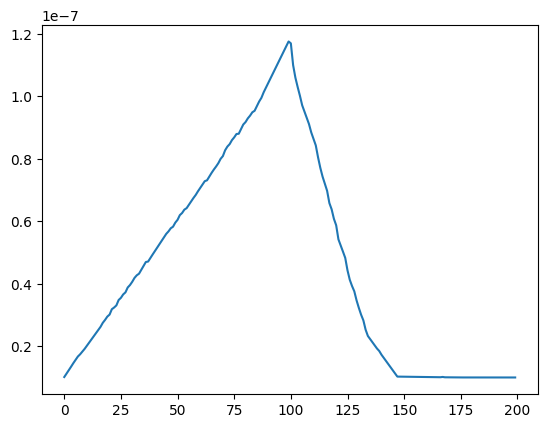

In [109]:
plt.plot(df['G'])

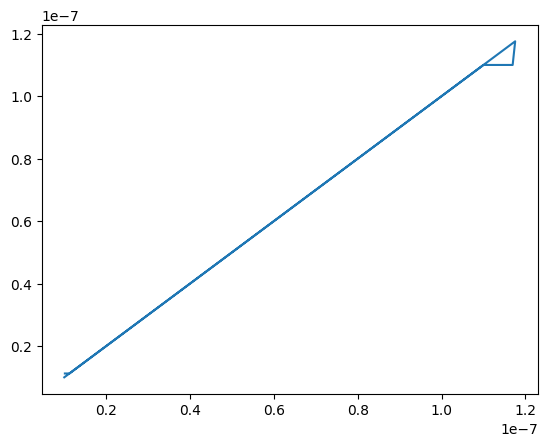

In [60]:
plt.plot(df['G'][:], df['deltaG'][:])

In [83]:
# x, y = list(df['G'][:100]), list(df['deltaG'][:100])
x, y = list(df['G'][101:]), list(df['deltaG'][101:])
x, y = list(reversed(x)), list(reversed(y))
unique_dict = {val: y[idx] for idx, val in enumerate(x)}

# Extract the unique x and y values
x_unique = list(unique_dict.keys())
y_unique = list(unique_dict.values())



f = UnivariateSpline(x_unique, y_unique, k=1)  # k=3 for cubic spline


# Generate new x-values for interpolation
x_new = np.linspace(1.3e-8, 1.05e-7, 100)

# Interpolate y-values
y_new = f(x_new)

ValueError: x must be increasing if s > 0

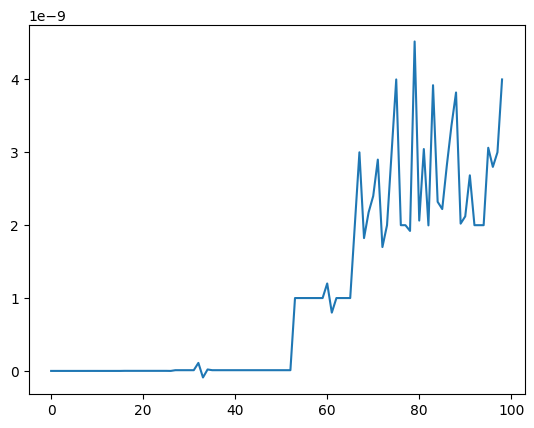

In [89]:
plt.plot([x[idx] - x[max(0, idx-1)] for idx in range(len(x)) ])

In [42]:
def get_spline(x, y):
    
    unique_dict = {val: y[idx] for idx, val in enumerate(x)}

    # Extract the unique x and y values
    x_unique = list(unique_dict.keys())
    y_unique = list(unique_dict.values())
    return interp1d(x_unique, y_unique, kind='cubic')


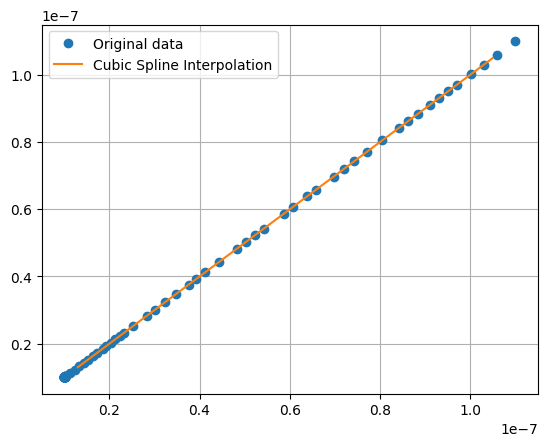

In [81]:
# Plot the original data and the interpolated curve
plt.plot(x, y, 'o', label='Original data')
plt.plot(x_new, y_new, '-', label='Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
set_x, set_y = list(df['G'][:50]), list(df['G/G0'][:50])
reset_x, reset_y = list(df['G'][51:]), list(df['G/G0'][51:])
reset_x, reset_y = list(reversed(reset_x)), list(reversed(reset_y))

set_spline = get_spline(set_x, set_y)
reset_spline = get_spline(reset_x, reset_y)

In [9]:

with open('data/datav2_setspline.pkl', 'wb') as f:
    pickle.dump(set_spline, f)



with open('data/datav2_resetspline.pkl', 'wb') as f:
    pickle.dump(reset_spline, f)



In [10]:
with open('data/datav2_setspline.pkl', 'rb') as f:
    loaded_spline = pickle.load(f)